# Author - Vikas Rajput

 In this kernel I am going to use **seaborn and matplotlib libraries**  for plotting some graphs
 
 ### My goal in this kernel is to learn Exploratory Data Analysis by knowing more about the datasets 

### First we have see which feature has more impact on car sales and carry out result of this

``` Secondly we have to train the classifier and to predict car sales and check the accuracy of the prediction.```



In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
car_sales = pd.read_csv("Car_sales.csv")

In [16]:
car_sales.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [107]:
#getting the shape of the dataframe
car_sales.shape

(157, 16)

In [18]:
# names of the columns 
car_sales.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [19]:
#basic statistics 
car_sales.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [20]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer           157 non-null object
Model                  157 non-null object
Sales_in_thousands     157 non-null float64
__year_resale_value    121 non-null float64
Vehicle_type           157 non-null object
Price_in_thousands     155 non-null float64
Engine_size            156 non-null float64
Horsepower             156 non-null float64
Wheelbase              156 non-null float64
Width                  156 non-null float64
Length                 156 non-null float64
Curb_weight            155 non-null float64
Fuel_capacity          156 non-null float64
Fuel_efficiency        154 non-null float64
Latest_Launch          157 non-null object
Power_perf_factor      155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.7+ KB


In [21]:
# getting different types of vehicle types
car_sales['Vehicle_type'].unique()

array(['Passenger', 'Car'], dtype=object)

In [92]:
#getting unique values of Manufactures
car_sales['Manufacturer'].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Lexus', 'Lincoln', 'Mitsubishi', 'Mercury',
       'Mercedes-B', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
       'Porsche', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

### # There are 2 type of vehicle type first we try to learn that how our sales depend on the ' vehicle type'

In [23]:
# 'Vehicle_type' is a categorical variable which has two values -- 'Passenger' and 'Car'

sns.set(style="ticks", color_codes=True)


Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

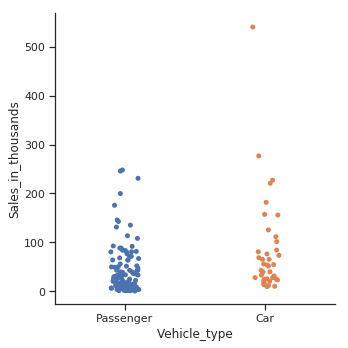

In [86]:
sns.catplot(x="Vehicle_type", y="Sales_in_thousands", data=car_sales);

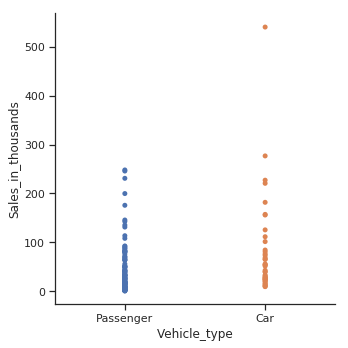

In [87]:
sns.catplot(x='Vehicle_type',y='Sales_in_thousands',jitter=False,data=car_sales)

 It can give a better representation of the distribution of observations, although it only works well for relatively small datasets. This kind of plot is sometimes called a “beeswarm” and is drawn in seaborn by swarmplot(), which is activated by setting ```kind="swarm" in catplot()```

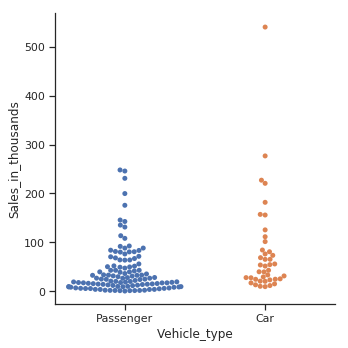

In [88]:
sns.catplot(x='Vehicle_type',y='Sales_in_thousands',kind='swarm',data=car_sales)

In [31]:
#get the count of rows for each type of vehicle type
car_sales.groupby('Vehicle_type').count()


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
Vehicle_type,,,,,,,,,,,,,,,
Car,41,41,41,30,40,40,40,40,40,40,40,40,40,41,40
Passenger,116,116,116,91,115,116,116,116,116,116,115,116,114,116,115


#### We can se that most of the Vehicles are of type 'Passenger'

In [60]:
rs = car_sales.groupby('Manufacturer')['Manufacturer','Sales_in_thousands']

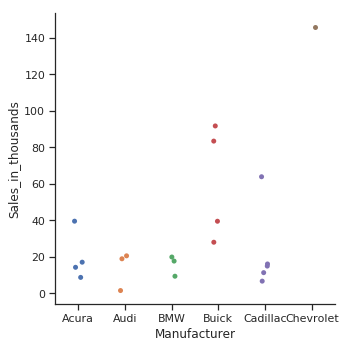

In [58]:
sns.catplot(x="Manufacturer", y="Sales_in_thousands", data=car_sales.head(20));

#### Below I am practising pandas library
Pandas library is very helpful in ``analyising, manipulating data``

In [67]:
grouped = car_sales.groupby('Manufacturer')

In [82]:
for group, df in grouped:
    #print(group,'\n')
    print(df[['Manufacturer','Model','Sales_in_thousands']],'\n')

  Manufacturer    Model  Sales_in_thousands
0        Acura  Integra              16.919
1        Acura       TL              39.384
2        Acura       CL              14.114
3        Acura       RL               8.588 

  Manufacturer Model  Sales_in_thousands
4         Audi    A4              20.397
5         Audi    A6              18.780
6         Audi    A8               1.380 

  Manufacturer Model  Sales_in_thousands
7          BMW  323i              19.747
8          BMW  328i               9.231
9          BMW  528i              17.527 

   Manufacturer        Model  Sales_in_thousands
10        Buick      Century              91.561
11        Buick        Regal              39.350
12        Buick  Park Avenue              27.851
13        Buick      LeSabre              83.257 

   Manufacturer     Model  Sales_in_thousands
14     Cadillac   DeVille              63.729
15     Cadillac   Seville              15.943
16     Cadillac  Eldorado               6.536
17     Cadillac

In [83]:
# for selecting specific columns from a dataframe
car_sales[['Manufacturer','Model','Sales_in_thousands']].head(20)

,Manufacturer,Model,Sales_in_thousands
0,Acura,Integra,16.919
1,Acura,TL,39.384
2,Acura,CL,14.114
3,Acura,RL,8.588
4,Audi,A4,20.397
5,Audi,A6,18.780
6,Audi,A8,1.380
7,BMW,323i,19.747
8,BMW,328i,9.231
9,BMW,528i,17.527


The most basic, which should be used ``when both variables are numeric, is the scatterplot() function``
scatterplot() info -- https://seaborn.pydata.org/tutorial/relational.html#relating-variables-with-scatter-plots

In [93]:
sns.set(style='darkgrid')

In [95]:
car_sales.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [101]:
car_sales.head(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [103]:
car_sales[['Model','Sales_in_thousands','Price_in_thousands','Engine_size','Horsepower','Width','Length','Fuel_efficiency']].head()

,Model,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Width,Length,Fuel_efficiency
0,Integra,16.919,21.50,1.8,140.0,67.3,172.4,28.0
1,TL,39.384,28.40,3.2,225.0,70.3,192.9,25.0
2,CL,14.114,NaN,3.2,225.0,70.6,192.0,26.0
3,RL,8.588,42.00,3.5,210.0,71.4,196.6,22.0
4,A4,20.397,23.99,1.8,150.0,68.2,178.0,27.0


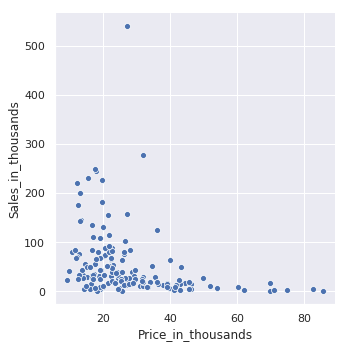

In [105]:
#seeing that relation between price and sales of car
sns.relplot(x='Price_in_thousands',y='Sales_in_thousands',data = car_sales)

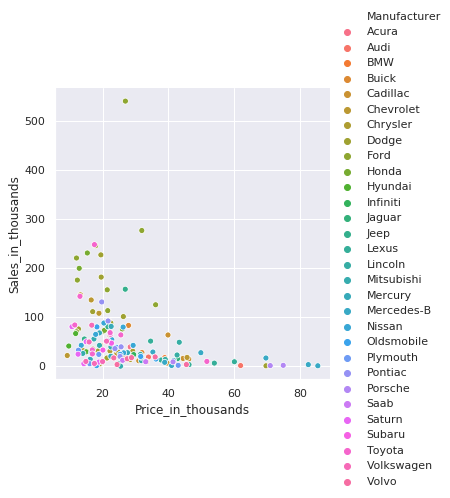

In [106]:
#plotting three variables with the scatterplot the third axis is hue
sns.relplot(x='Price_in_thousands', y='Sales_in_thousands',hue='Manufacturer',data=car_sales)


# we can infer from the below graph most of the cars are in price range 50k and have sales upto 100k


In [109]:
car_sales.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [111]:
# seeing the statistics of parameter 'Engine_size'
car_sales.Engine_size.describe()

count    156.000000
mean       3.060897
std        1.044653
min        1.000000
25%        2.300000
50%        3.000000
75%        3.575000
max        8.000000
Name: Engine_size, dtype: float64

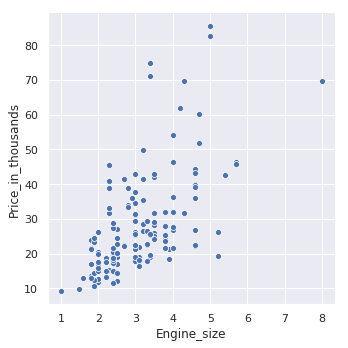

In [116]:
#car_sales.Engine_size.unique()
sns.relplot(y='Price_in_thousands',x='Engine_size',data=car_sales)

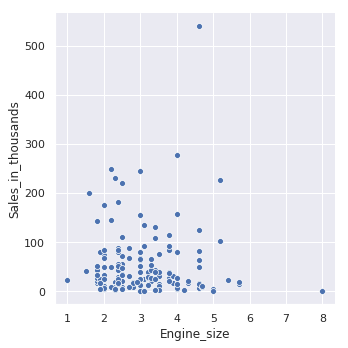

In [118]:
sns.relplot(y='Sales_in_thousands',x='Engine_size',data=car_sales)

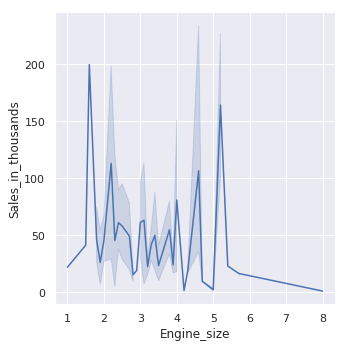

In [120]:
sns.relplot(x='Engine_size',y='Sales_in_thousands',kind='line',data=car_sales)

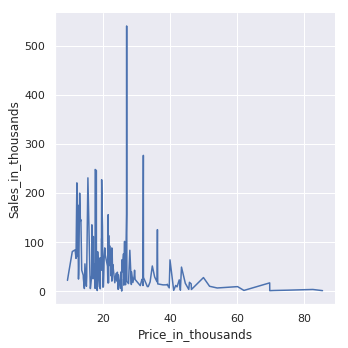

In [122]:
sns.relplot(x='Price_in_thousands',y='Sales_in_thousands',kind='line',data=car_sales)

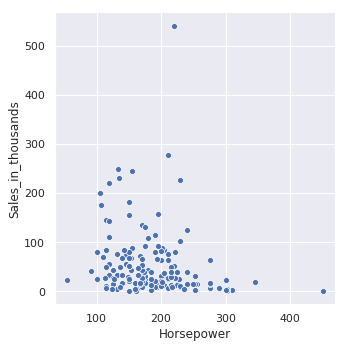

In [126]:
sns.relplot(x='Horsepower',y='Sales_in_thousands',kind='scatter',data=car_sales)

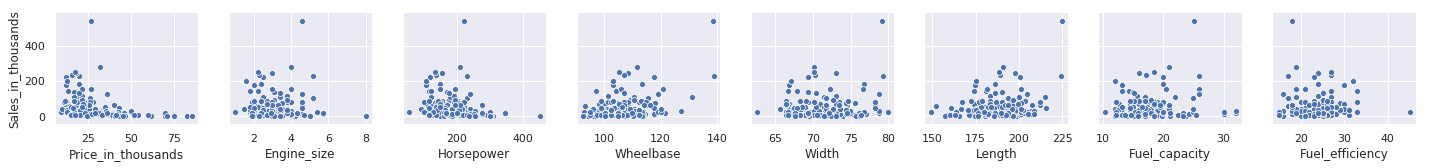

In [131]:
sns.pairplot(data=car_sales,x_vars=['Price_in_thousands','Engine_size','Horsepower','Wheelbase', 'Width', 'Length','Fuel_capacity',
       'Fuel_efficiency'],y_vars=['Sales_in_thousands'])